# Análisis del Mercado de Vehículos Usados

## 1.0 Introduccion

* Este proyecto presenta una aplicación web desarrollada para realizar un análisis exploratorio de datos sobre un conjunto de anuncios de venta de vehículos. A través del uso de Python, Pandas, Plotly Express y Streamlit, se construyó una herramienta interactiva que permite visualizar y analizar patrones relevantes dentro del mercado automotriz.

* La aplicación facilita la exploración de variables como el kilometraje y el precio, mediante gráficos dinámicos que ayudan a identificar distribuciones, tendencias y posibles relaciones entre los datos. Su objetivo principal es demostrar la aplicación práctica del análisis exploratorio y la visualización interactiva de datos en un entorno web accesible.

## 1.1 Inicialización de librerias 

In [165]:
# Importacion de librerias

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## 1.2 Carga y asignacion de dataframes

In [166]:
# Carga de dataframe

data_path = Path("../data/vehicles_us.csv").resolve()

car_data = pd.read_csv(data_path)

print("Dataset cargado correctamente ✅")

Dataset cargado correctamente ✅


## 2.0 Análisis exploratorio de datos

## 2.1 Pre visualizacion de los datos

In [167]:
# Se agregan para una buena visualizacion de los datos
pd.set_option ('display.max_columns', 200)    # Muestra todas las columnas
pd.set_option ('display.width', 150)          # Evita que las divida en varias líneas

# Visualicion de los df
print(car_data.head(10))

   price  model_year           model  condition  cylinders fuel  odometer transmission    type paint_color  is_4wd date_posted  days_listed
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0    automatic     SUV         NaN     1.0  2018-06-23           19
1  25500         NaN      ford f-150       good        6.0  gas   88705.0    automatic  pickup       white     1.0  2018-10-19           50
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0    automatic   sedan         red     NaN  2019-02-07           79
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN    automatic  pickup         NaN     NaN  2019-03-22            9
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0    automatic   sedan       black     NaN  2019-04-02           28
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0    automatic   sedan       black     1.0  2018-06-20           15
6  12990      2015.0

In [168]:
# Informacion general de los df

car_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Justificación Pre visualizacion de los datos

* El conjunto de datos contiene 51,525 registros de anuncios de vehículos en venta. Sin embargo, no todas las columnas presentan el mismo número de valores válidos, lo que indica la existencia de datos faltantes en variables como model_year, cylinders y odometer.

* En esta etapa inicial se identificó la necesidad de evaluar la calidad de los datos, especialmente en aquellas columnas numéricas clave para el análisis posterior. Esta revisión permitió detectar posibles inconsistencias y preparar el dataset para un análisis más profundo.

## 2.2 Carga y Preprocesamiento Inicial de los Datos

In [169]:
# Valdacion de datos nulos

car_data.isna().sum()


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [170]:
# Porcentaje de datos nulos por columna

car_data.isna().mean() * 100


price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [171]:
# Transformacion de la columna date_posted a formato datetime

car_data['date_posted'] = pd.to_datetime(car_data['date_posted'])


In [172]:
# Validacion de datos duplicados

car_data.duplicated().sum()


np.int64(0)

In [173]:
# Analisis estadistico de las columnas numericas

car_data.describe()


,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,2018-10-25 01:57:46.270742528,39.55476
min,1.000000,1908.000000,3.000000,0.000000,1.0,2018-05-01 00:00:00,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,2018-07-29 00:00:00,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,2018-10-25 00:00:00,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,2019-01-21 00:00:00,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,2019-04-19 00:00:00,271.00000
std,10040.803015,6.282065,1.660360,65094.611341,0.0,NaN,28.20427


### Justificación Carga y Preprocesamiento Inicial de los Datos

In [174]:
# Porcentaje de datos nulos por columna

car_data.isna().mean() * 100


price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

* Se realizó un análisis estadístico descriptivo de las variables numéricas con el fin de comprender la distribución y el comportamiento general de los datos.

* El precio promedio de los vehículos es de aproximadamente $12,132, con una amplia variabilidad y valores extremos que alcanzan los $375,000, lo que sugiere la presencia de posibles outliers.

* El año del modelo tiene un promedio cercano a 2009, aunque se identifican valores atípicos como 1908, que podrían indicar errores de registro.

* En cuanto al kilometraje (odometer), el promedio es de 115,553 millas, con valores máximos muy elevados (hasta 990,000 millas), lo que también podría representar datos atípicos.

* El tiempo promedio que un vehículo permanece publicado es de 39 días, lo que aporta información relevante sobre la dinámica del mercado.

* Este análisis permitió identificar patrones generales, valores extremos y posibles inconsistencias, sentando las bases para el proceso de limpieza y transformación de datos.

## 3.0 Diagnóstico de Valores Atípicos

## 3.1 Percentiles para detectar extremos

In [175]:
car_data['price'].describe(percentiles=[0.01, 0.05, 0.95, 0.99])


count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
1%            1.000000
5%         1950.000000
50%        9000.000000
95%       30300.000000
99%       43995.000000
max      375000.000000
Name: price, dtype: float64

In [176]:
car_data['odometer'].describe(percentiles=[0.01, 0.05, 0.95, 0.99])


count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
1%          117.000000
5%        16320.200000
50%      113000.000000
95%      223297.000000
99%      286800.000000
max      990000.000000
Name: odometer, dtype: float64

## 3.2 Visualización antes de limpieza

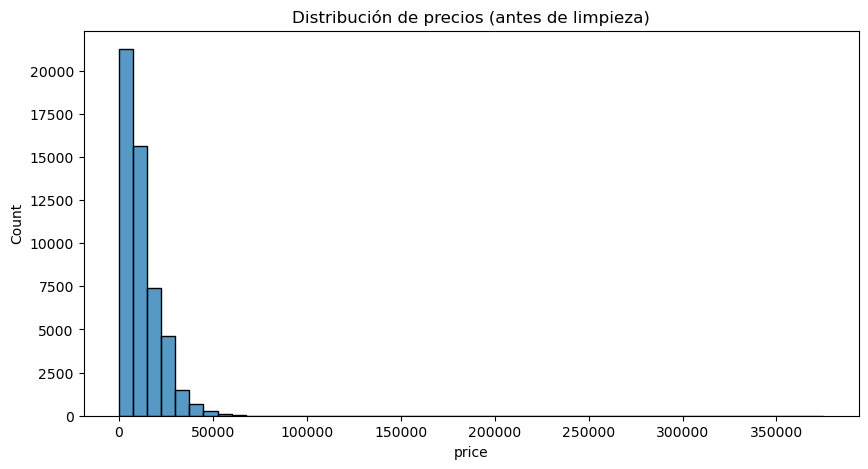

In [177]:
# Precio

plt.figure(figsize=(10,5))
sns.histplot(car_data['price'].dropna(), bins=50)
plt.title("Distribución de precios (antes de limpieza)")
plt.show()



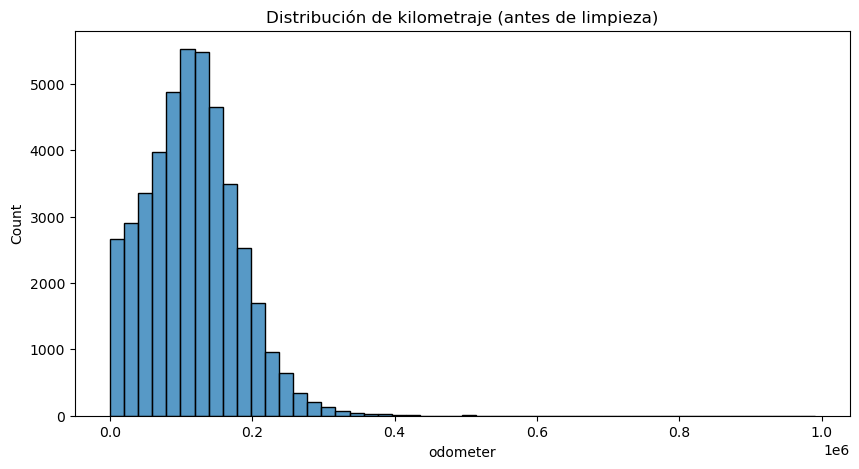

In [178]:
# Kilometraje

plt.figure(figsize=(10,5))
sns.histplot(car_data['odometer'].dropna(), bins=50)
plt.title("Distribución de kilometraje (antes de limpieza)")
plt.show()


## 4.0 Limpieza de Datos

## 4.1 Filtrado por percentiles (1% – 99%)

In [179]:
price_low = car_data['price'].quantile(0.01)
price_high = car_data['price'].quantile(0.99)

odo_low = car_data['odometer'].quantile(0.01)
odo_high = car_data['odometer'].quantile(0.99)

car_data_clean = car_data[
    (car_data['price'] >= price_low) & 
    (car_data['price'] <= price_high) &
    (car_data['odometer'] >= odo_low) &
    (car_data['odometer'] <= odo_high)
].copy()


## 4.2 Antigüedad del vehículo

In [180]:
car_data_clean['model_year'] = pd.to_numeric(
    car_data_clean['model_year'], 
    errors='coerce'
)

current_year = 2019
car_data_clean['vehicle_age'] = current_year - car_data_clean['model_year']


## 4.3 Normalización de variable binaria

In [181]:
car_data_clean['is_4wd'] = car_data_clean['is_4wd'].fillna(0)
car_data_clean['is_4wd'] = car_data_clean['is_4wd'].astype(int)


## 5.0 Visualizaciones Post-Limpieza

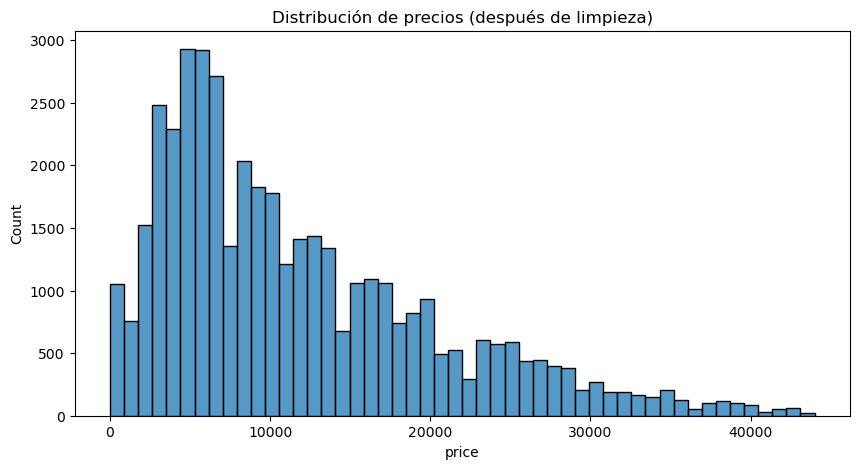

In [182]:
# Histograma después de limpieza

plt.figure(figsize=(10,5))
sns.histplot(car_data_clean['price'].dropna(), bins=50)
plt.title("Distribución de precios (después de limpieza)")
plt.show()


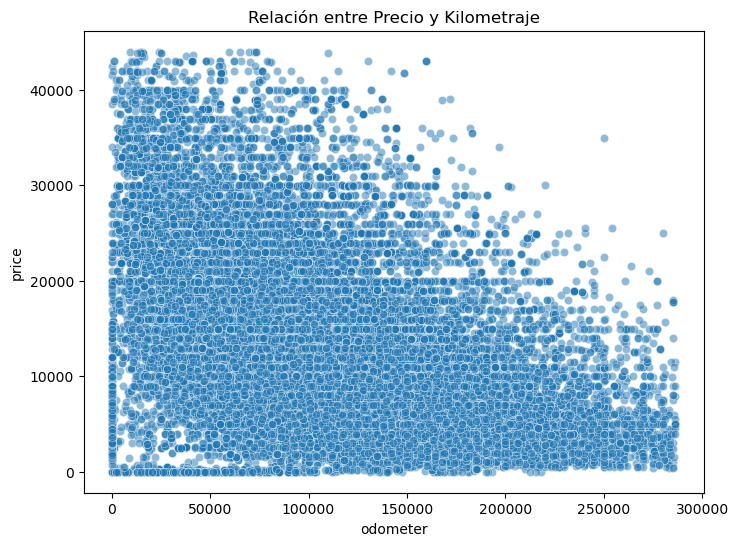

In [183]:
# Relación Precio vs Kilometraje

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=car_data_clean,
    x='odometer',
    y='price',
    alpha=0.5
)

plt.title("Relación entre Precio y Kilometraje")
plt.show()



### 5.1 Comparación Antes vs Después de Limpieza

In [184]:
# Validacion trabajo de limpieza

print("Filas originales:", car_data.shape[0])
print("Filas después de limpieza:", car_data_clean.shape[0])
print("Registros eliminados:", car_data.shape[0] - car_data_clean.shape[0])


Filas originales: 51525
Filas después de limpieza: 42331
Registros eliminados: 9194


### Justificación Comparación Antes vs Después de Limpieza

* El proceso de filtrado basado en percentiles (1%–99%) redujo el conjunto de datos de 51,525 a 42,331 registros, eliminando 9,194 observaciones (aproximadamente 18% del total).

* Esta reducción corresponde a valores extremos en precio y kilometraje que distorsionaban la distribución y afectaban la interpretación visual y estadística del dataset.

* El porcentaje eliminado es consistente con el uso de percentiles para recortar colas extremas en ambas variables, permitiendo conservar la mayoría de los datos representativos del mercado sin introducir sesgos arbitrarios.

* La limpieza mejora la estabilidad del análisis y garantiza que las visualizaciones reflejen tendencias reales en lugar de casos atípicos.

## 5.2  Análisis de Correlación entre Variables Clave

In [185]:
car_data_clean[['price', 'odometer', 'vehicle_age']].corr()


,price,odometer,vehicle_age
price,1.000000,-0.467439,-0.472699
odometer,-0.467439,1.000000,0.498670
vehicle_age,-0.472699,0.498670,1.000000


### Justificación Análisis de Correlación entre Variables Clave

* El análisis de correlación muestra una relación negativa moderada entre el precio y el kilometraje (-0.47), lo que indica que, en promedio, los vehículos con mayor uso tienden a tener menor valor de mercado.

* De manera similar, se observa una correlación negativa entre el precio y la antigüedad del vehículo (-0.47), confirmando que los vehículos más antiguos tienden a depreciarse.

* Además, existe una correlación positiva moderada entre kilometraje y antigüedad (0.50), lo cual es consistente con la lógica del mercado: los vehículos más antiguos suelen acumular mayor recorrido.

* Estos resultados validan la coherencia interna del dataset y respaldan la inclusión de variables como odometer y vehicle_age como factores explicativos clave en el análisis del precio.

## 5.3 Análisis por tipo de vehículo

In [186]:
car_data_clean.groupby('type')['price'].mean().sort_values(ascending=False)


type
bus            16620.260870
truck          15996.216757
pickup         15751.038685
coupe          13863.721725
offroad        13598.811111
convertible    12907.664804
other          10963.389671
SUV            10948.966064
wagon           9044.606299
van             8988.428279
mini-van        8146.295617
sedan           6938.529833
hatchback       6805.009009
Name: price, dtype: float64

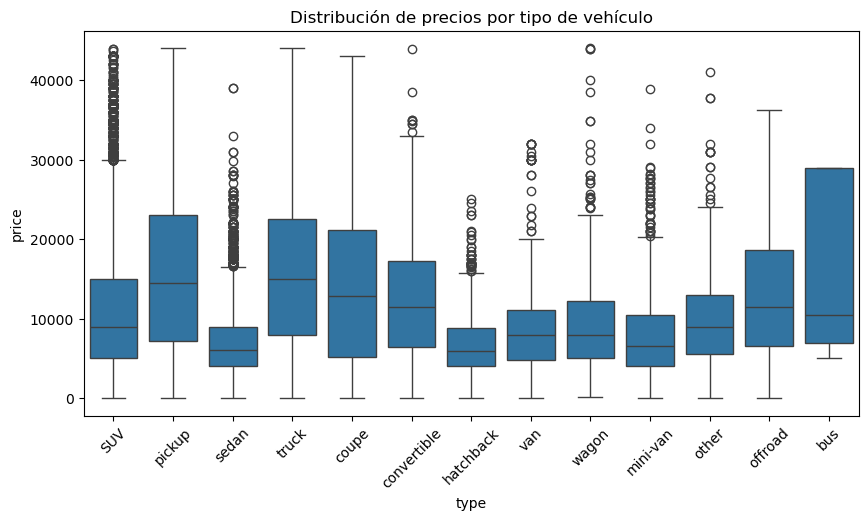

In [187]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=car_data_clean,
    x='type',
    y='price'
)
plt.xticks(rotation=45)
plt.title("Distribución de precios por tipo de vehículo")
plt.show()


### Justificación Análisis por tipo de vehículo

* El análisis por tipo de vehículo revela diferencias claras en el comportamiento del precio promedio entre categorías.

* Los vehículos tipo bus, truck y pickup presentan los precios promedio más altos del conjunto de datos, lo cual puede explicarse por su mayor tamaño, capacidad de carga y uso comercial.

* En contraste, categorías como sedan y hatchback muestran los precios promedio más bajos, lo que sugiere que corresponden a segmentos más accesibles y de uso urbano.

* El boxplot confirma además la existencia de mayor dispersión en categorías como truck, pickup y SUV, lo que indica una amplia variabilidad en precio dentro de estos segmentos, posiblemente asociada a diferencias en antigüedad, equipamiento o condición del vehículo.

* Por otro lado, segmentos como hatchback y sedan presentan menor variabilidad relativa, lo que sugiere un mercado más homogéneo.

* Este análisis refuerza la importancia de incluir el tipo de vehículo como variable explicativa clave en el dashboard interactivo, dado su impacto significativo en la estructura de precios.

## 6.0 Conclusiones Generales del Análisis

## 6.1 Impacto del Proceso de Limpieza

* La aplicación de un filtrado basado en percentiles (1%–99%) permitió eliminar valores extremos en precio y kilometraje que distorsionaban las distribuciones originales.

* El proceso redujo el dataset en aproximadamente 18%, conservando más de 42,000 registros representativos del mercado. Esta estrategia permitió mejorar la estabilidad estadística sin comprometer la integridad del análisis.

## 6.2 Factores Clave que Influyen en el Precio

* El análisis de correlación evidenció una relación negativa moderada entre el precio y el kilometraje (-0.47), así como entre el precio y la antigüedad del vehículo (-0.47).

* Estos resultados confirman que el desgaste y el paso del tiempo son factores determinantes en la depreciación del vehículo.

* Asimismo, la correlación positiva entre antigüedad y kilometraje (0.50) valida la coherencia interna del dataset, ya que los vehículos más antiguos tienden a acumular mayor recorrido.

## 6.3 Diferencias por Segmento de Vehículo

* El análisis por tipo de vehículo mostró diferencias significativas en la estructura de precios entre categorías.

* Segmentos como truck, pickup y bus presentan los precios promedio más altos y mayor dispersión, lo que sugiere mercados más heterogéneos y posiblemente asociados a usos comerciales o configuraciones especializadas.

* En contraste, categorías como sedan y hatchback muestran precios promedio más bajos y menor variabilidad, indicando un segmento más estable y accesible.

* Esto demuestra que el tipo de vehículo es una variable explicativa relevante y debe considerarse en cualquier modelo o visualización interactiva del mercado.

## 6.4 Preparación para Implementación en Dashboard

* Tras el proceso de limpieza, ingeniería de variables y validación estadística, el dataset resultante se encuentra en condiciones óptimas para su implementación en un dashboard interactivo.

* La incorporación de métricas clave, filtros dinámicos y visualizaciones permitirá explorar de manera intuitiva la relación entre precio, kilometraje, antigüedad y tipo de vehículo, facilitando la toma de decisiones basada en datos.

## Conclusión

* El análisis confirma que el mercado de vehículos usados presenta patrones consistentes con la lógica económica de depreciación: mayor antigüedad y kilometraje se asocian a menores precios, mientras que el segmento del vehículo introduce variaciones significativas en la estructura de valor.

* La combinación de limpieza robusta, análisis exploratorio y validación estadística garantiza que el dashboard desarrollado posteriormente se apoye en datos confiables y representativos del comportamiento real del mercado.